<center> <h2> DS 3000 - Summer 2020</h2> </center>
<center> <h3> DS Report </h3> </center>

<center> <h3>Analyzing Stock Market Trends</h3> </center>
<center> <h4>Eric Weiss and Jake Janowski</h4> </center>

<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary

In the midst of a global pandemic, it is arguably more crucial than ever to financially prepare for difficult times ahead. With this in mind, investing in the stock market could be an excellent way to potentially grow one's net worth and stay ahead of inflation; however, it is also possible that an investor loses money when investing. Thus, a stock market price predictor could be a valuable tool when considering companies to invest in. With this in mind, *we aim to create a prediction model highlighting publicly traded companies that are indicated to be good investments*. This will be based on a number of features relevant to the yearly success of a business.

Five years' worth of data relevant to companies publicly traded in the US stock market were collected and analyzed. There were two target variables. The first was a binary 'Class' referring to a classification model, with the outcomes being "Buy" and "No Buy". The second was 'PriceVariation_NextYear', a numerical score rating the relative predicted benefit or detriment of investing in the respective stock over the coming year.

<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. Introduction

### Problem Statement

As college students anxious to get out into the “real world” and get started with our careers, those of us who are thankfully safe during the COVID-19 pandemic are left wondering what will happen to the job market in the coming years. Surely the economy will recover, but in what timeframe? Also in that same vein, which firms will come out of this pandemic stronger than before, looking to hire young talent out of university, and which will succumb to the negatives pressures of the upcoming recession. These firms may not be safe bets for recently graduating students to apply to. 

The newest generation to join the workforce will inherently feel the negative effects of this recession harder than any other, according to initial studies done by the Resolution Foundation in partnership with the BBC (Coronavirus). With rampant and historic job loss for these young people and recent graduates, being able to more clearly understand trends of individual firms' stock prices may enable them to recoup some of their lost incomes. Authors such as John Rekenthaler for the Morning Star have pointed out the disconnect between the actual economy and its stock market counterpart (Rekenthaler). With this in mind, enabling better stock market trend understanding will give young people the ability to potentially grow their savings in a time that they're disproportionately losing their regular wages.

The project is focused on individual firms and their stock market performance. The goal of the project is to predict whether a stock will be classified as a Buy for the next year (meaning its stock price variation from year to year is positive), or as a No Buy, where the stock price has a negative variation from one year to the next. Our dataset contains over 200 features of financial information on nearly 5,000 firms. We hope to be able to predict a firm's upcoming success or lack thereof in the market, as measured by this classification. 

### Significance of the Problem

The problem's significance is displayed by the raw power of economic forces, especially the recent impacts of COVID-19 on the world's economy. Former Federal Reserve Chair Janet Yellen said on CNBC, "Probably for the second quarter, at an annual rate, we’re going to be looking at a decline in GDP of at least 30%, and I’ve seen far higher numbers" (Pei). By helping young adults like us who seek to mitigate the negative impacts of job loss through other revenue streams, this problem conveys its significance. Additionally, creating a model able to predict the successes of firms in the stock market would be an exhilarating discovery.

Previous work on modeling future stock market performance has routinely proposed new algorithms that can better predict daily changes in stock prices. One such work by Hegazy et al. proposes a model based on the integration of Particle swarm optimization (PSO) and least square support vector machine (LS-SVM). Much past work on the topic of market prediction is conducted from the daily price perspective, while our look into the market will be from a yearly perspective instead.

### Questions

Given the aforementioned problem and its importance, we set out to tackle the following questions:
   * Does a firm's sector have a role in determining the quantity of variability of annual stock price explained by the features we have?
        
   * What individual feature from firms' annual financial statements best explains the variation in annual stock price? 
   
   * Will models perform better on a classification target or a continuous regression target, all features remaining the same?
   
   * Which models will give the best results in terms of both classification and regression targets?
   
   * Simply, will a model be able to accurately predict either target or are firms' market movements too complex?
    
### Hypotheses
   
   * **Hypothesis about features in regression:**
        * Null Hypothesis (H0, 0): The annual price variation of each stock and selected financial features have no relationship.
        * Alternate Hypothesis (H1, 0): The annual price variation of each stock and selected financial features have a relationship.
   * **Hypothesis about features in classification:**
        * Null Hypothesis (H0, 1): The Buy rating classification of each stock and selected financial features have no relationship.
        * Alternate Hypothesis (H1, 1): The Buy rating classification of each stock and selected financial features have a relationship.
   * **Hypothesis about sector price variation:**
        * Null Hypothesis (H0, 2): There will not be statistically significant variation in the mean of `PriceVariation_NextYear` between each market sector.
        * Alternate Hypothesis (H1, 2): There will be statistically significant variation in the mean of `PriceVariation_NextYear` between each market sector.
   * **Hypothesis about machine learning algorithms:**
        * Null Hypothesis (H0, 3): We will not be able to better predict a stock's Buy or No Buy classification compared to its annual price variation.
        * Alternate Hypothesis (H1, 3): We will be able to better predict a stock's Buy or No Buy classification compared to its annual price variation.

#### References

“Coronavirus: Young People 'Most Likely to Lose Work' in Lockdown.” BBC News, BBC, 19 May 2020, www.bbc.com/news/business-52717942.

Rekenthaler, John. “The Stock Market Is Not the Economy.” Morningstar, Inc., Morningstar, 4 May 2020, www.morningstar.com/articles/982525/the-stock-market-is-not-the-economy.

Hegazy, Osman & Soliman, Omar S. & Abdul Salam, Mustafa. (2013). A Machine Learning Model for Stock Market Prediction. International Journal of Computer Science and Telecommunications. 4. 17-23. https://www.researchgate.net/publication/259240183_A_Machine_Learning_Model_for_Stock_Market_Prediction#:~:text=Stock%20market%20prediction%20is%20the,price%20will%20maximize%20investor's%20gains.

Pei, Annie. “Wall Street Bounces Back from a Steep Sell-off. Here's What to Expect Next.” CNBC Trading Nation, CNBC, 6 Apr. 2020, www.cnbc.com/2020/04/06/stock-market-bounces-back-from-a-steep-sell-off-heres-what-to-expect.html.

## 2. Method

### 2.1. Data Acquisition

Our data was sourced from Nicolas Carbone on Kaggle, [linked here](https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018). Carbone's data is reported to come from each firm's 10-K filings, pulled using a Financial Modeling Prep API whose documentation is [linked here](https://financialmodelingprep.com/developer/docs/). You can find this data on our GitHub repository [linked here](https://github.com/ericweiss199/FinancialData). Data was pulled form years 2014-2018, which each year being its own csv file. We chose to concatenate these files into one DataFrame for easy use. This dataset contains 225 financial features of nearly 5,000 publicly traded companies. Each feature measures a different portion of that company's financials, such as Revenue and its corresponding growth rate, Selling, General and Administrative Expenses and its growth rate, and expenses in Interest and Operations. Each firm's market sector is also reported in the data, which we explore throughout our model creation. All 11 sectors are represented in this dataset. 

### 2.2. Variables
- **IV0**: The features used in prediction.
- **DV0**: The regression modeling target variable. <font color=blue>*`PriceVariation_NextYear` is the regression target*</font>*, which measures the change in stock price in the year following the 10-K information.*  
<br> 
- **IV1**: The features used in prediction.
- **DV1**: The classification modeling target variable. <font color=blue>*`Class` is the binary classification target*</font>*, where 0 signifies a negative price variation and therefore a No Buy and 1 represents a positive price variation in the stock, making it the Buy category.*  
<br>
- **IV2**: `SG&A Expenses Growth`. *Selling, General, and Administrative Expenses for a firm include employee compensation, rent payments, and advertising spend. The growth rate of SG&A Expense can be interpreted as the rate at which the company is growing, as it pays more workers, rents new facilities, and buys more advertising.*
- **DV2**: The regression modeling target variable.  
<br>
- **IV3**: The form of modeling used. *Here, we compare the effectiveness of regression modeling on a continuous variable to the effectiveness of binary classification prediction.*
- **DV3**: The accuracy of our models. *The models' predictive ability will be measured using their r^2 values and compared employing ANOVA procedures.*

### 2.3. Data Analysis
We plan to implement two predictive models on two seperate target variables, as explained above.
   * **Regression:** `PriceVariation_NextYear` measures the change in stock price in the year following the 10-K information.
   * **Binary Classification:** `Class` where 0 signifies a negative price variation and therefore a No Buy and 1 represents a positive price variation in the stock, making it the Buy category.
   
Both models will use the same feature set to predict their respective target variable.  
Both models are also examples of supervised learning techniques, as we are using a subset of our data to train the model, where it will have access to either the classification of the stock or its annual price variation, the variables to predict, in order to understand patterns and relationships in the data.  
  
We will be using a variety of Machine Learning algorithms in order to compare the effectiveness of each one. We plan use select algorithms for the classification model such as Categorical Naïve Bayes, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, and AdaBoostClassifier. We chose these models based on previous experience, Teaching Assistant recommendation, and especially the desire to examine different forms of classifiers. On the other hand, we also aim to use Regressors when predicting the continuous target variable. These algorithms include DecisionTreeRegressor, GradientBoostingRegressor, RandomForestRegressor, Linear Regression, Ridge, and Lasso. We chose these regressors for the same reasons we chose our classifiers. We also aimed to limit the amount of generalizing assumptions we would need to make in order to implement these algorithms. 

<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. Results

### 3.1.  Data Wrangling

We performed many feature reduction techniques on this dataset due primarily to its size. With over 200 features to work with, we knew we would need to reduce these features to a reasonable quantity before being able to proceed with modeling. In addition, many of these techniques are actually available through the sklearn library. However, we decided to actually implement feature reduction techniques on our own through a multi-step process. 

In [165]:
# import necessary packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [166]:
df_2014 = pd.read_csv('2014_Financial_Data.csv')
df_2015 = pd.read_csv('2015_Financial_Data.csv')
df_2016 = pd.read_csv('2016_Financial_Data.csv')
df_2017 = pd.read_csv('2017_Financial_Data.csv')
df_2018 = pd.read_csv('2018_Financial_Data.csv')

In this first step, we both combined our dataset into a single working DataFrame as well as begun the feature reduction process. Since each year's data is located in its own csv file, we elected to drop features with excessive NaN values iteratively through a list of all such files. By iteration, we are also able to add the `Year` to each instance which we later use to group our data by. In terms of grouping, we elected to employ multi-level or hierarchical indexing. We grouped our dataset first by a firm's `Sector`, then its `Ticker` value, and then finally the `Year` of that instance. We thought this grouping would show the data more intuitively to the reader and perhaps allow us to see patterns in it more clearly as well. Lastly, we impute data with each feature's median values as all features are continuous. 

In [167]:
# Step 1 of Feature Reduction: Missing Value Ratios and Imputation

og_df_list = [df_2014, df_2015, df_2016, df_2017, df_2018]
# using only columns with a certain amount of non-Nan values
def del_many_nulls(df_list, threshold):
    '''
    This function takes a list of DataFrames and a threshold
    of the % of that column that may be NaN before it is dropped.
    '''
    new_df_list = []
    for df in df_list:
        # saving missing values in a variable
        null_prc = df.isnull().sum()/len(df)*100
        # saving column names in a variable
        all_features = df.columns
        good_features = []
        for i in range(len(all_features)):
            if null_prc[i]<=threshold:   # setting the threshold
                good_features.append(all_features[i])
        df = df[good_features]
        new_df_list.append(df)
    return new_df_list

# removed features with over 70% null values
new_df_list = del_many_nulls(og_df_list, 70)

# regulate price variation column names in dataframes
year=2014
for df in new_df_list:
    df['Year'] = year # add a year column for easier indexing
    price_var = df.columns[-3]
    df.rename(columns={price_var:'PriceVariation_NextYear'}, inplace=True)
    year+=1

# making sure to use same columns in all datasets to concatenate
# hierarchical indexing by ticker followed by year
# drop all rows with missing values
merged = pd.concat(new_df_list, join='inner').rename(columns={'Unnamed: 0':'Ticker'})
merged = merged.sort_values(by=['Sector', 'Ticker', 'Year']).set_index(['Sector', 'Ticker', 'Year'])

# impute missing values with median values
merged.fillna(merged.median(), inplace=True)

merged

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Revenue  Revenue Growth  Cost of Revenue  \
Sector          Ticker Year                                                  
Basic Materials AA     2014  1.314700e+10          0.0457     1.054800e+10   
                       2015  1.119900e+10         -0.1482     9.039000e+09   
                       2016  9.318000e+09         -0.1680     7.877000e+09   
                       2017  1.165200e+10          0.2505     8.991000e+09   
                       2018  1.340300e+10          0.1503     1.008100e+10   
...                                   ...             ...              ...   
Utilities       YORW   2014  4.590000e+07          0.0830     9.079000e+06   
                       2015  4.708900e+07          0.0259     9.195000e+06   
                       2016  4.758400e+07          0.0105     9.145000e+06   
                       2017  4.858900e+07          0.0211     1.002400e+07   
                       2018  4.843700e+07         -0.0031     1.081500e+07   

                             Gross Profit  R&D Expenses  SG&A Expense  \
Sector          Ticker Year                                             
Basic Materials AA     2014  2.599000e+09    95000000.0   383000000.0   
                       2015  2.160000e+09    69000000.0   353000000.0   
                       2016  1.441000e+09    33000000.0   356000000.0   
                       2017  2.661000e+09    32000000.0   280000000.0   
                       2018  3.322000e+09    31000000.0   248000000.0   
...                                   ...           ...           ...   
Utilities       YORW   2014  3.682100e+07           0.0     8812000.0   
                       2015  3.789400e+07           0.0     9082000.0   
                       2016  3.843900e+07           0.0     9129000.0   
                       2017  3.856500e+07           0.0     8103000.0   
                       2018  3.762200e+07           0.0     8095000.0   

                             Operating Expenses  Operating Income  \
Sector          Ticker Year                                         
Basic Materials AA     2014        2.353000e+09      2.460000e+08   
                       2015        2.227000e+09     -6.700000e+07   
                       2016        1.360000e+09      8.100000e+07   
                       2017        1.398000e+09      1.263000e+09   
                       2018        1.603000e+09      1.719000e+09   
...                                         ...               ...   
Utilities       YORW   2014        1.474400e+07      2.207700e+07   
                       2015        1.523300e+07      2.266100e+07   
                       2016        1.555100e+07      2.288800e+07   
                       2017        1.487200e+07      2.369300e+07   
                       2018        1.510500e+07      2.251700e+07   

                             Interest Expense  Earnings before Tax  ...  \
Sector          Ticker Year                                         ...   
Basic Materials AA     2014       309000000.0           28000000.0  ...   
                       2015       270000000.0         -461000000.0  ...   
                       2016       243000000.0         -216000000.0  ...   
                       2017       104000000.0          817000000.0  ...   
                       2018       122000000.0          953000000.0  ...   
...                                       ...                  ...  ...   
Utilities       YORW   2014         5206000.0           16361000.0  ...   
                       2015         5182000.0           17229000.0  ...   
                       2016         5265000.0           17255000.0  ...   
                       2017         5348000.0           17517000.0  ...   
                       2018         5509000.0           15867000.0  ...   

                             3Y Dividend per Share Growth (per Share)  \
Sector          Ticker Year                                             
Basic Materials AA     2014                      

In this second step, we both applied a transformer to our data so that it can be better optimized for machine learning but also dropped features which exhibited extremely low variance. We chose the QuantileTransformer as it is more robust than other standardizers we have seen in class. This dataset is rife with outliers and extreme data points, so in response we needed a transformer which would be able to handle such outliers. Also, while we have not explored relationships inside the data yet, we assumed our data would not hold linear relationships to the target variables. QuantileTransformer is a non-linear transformer, which makes non-linear relationships easier for ML modeling and linear relationships harder. In addition to data transformation, we also dropped a few features due to their extremely low variance. A feature with low variance will not help train the ML models we will use effectively, so we decided to simply get rid of these features. A variance value of .05 was picked, however not necessarily arbitrarily. We wanted to skim only a few features from the data to ensure variance was strong throughout, and so we settled on this value.

In [168]:
# Step 2 of Feature Reduction: Low Variance Filtering

# transforming data for processing
from sklearn.preprocessing import QuantileTransformer

features = merged.drop(['PriceVariation_NextYear', 'Class'], axis=1)
reg_target = merged['PriceVariation_NextYear']
class_target = merged['Class']

scaler = QuantileTransformer()
scaler.fit(features)
features_scaled = scaler.transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# variance of each feature
i = 0
var = features_scaled.var()
low_var = []
for row in var:
    if row < .05:
        low_var.append(var.index[i])
        i+=1

merged_var = merged.drop(columns=low_var)
merged_var

Gross Profit  R&D Expenses  SG&A Expense  \
Sector          Ticker Year                                             
Basic Materials AA     2014  2.599000e+09    95000000.0   383000000.0   
                       2015  2.160000e+09    69000000.0   353000000.0   
                       2016  1.441000e+09    33000000.0   356000000.0   
                       2017  2.661000e+09    32000000.0   280000000.0   
                       2018  3.322000e+09    31000000.0   248000000.0   
...                                   ...           ...           ...   
Utilities       YORW   2014  3.682100e+07           0.0     8812000.0   
                       2015  3.789400e+07           0.0     9082000.0   
                       2016  3.843900e+07           0.0     9129000.0   
                       2017  3.856500e+07           0.0     8103000.0   
                       2018  3.762200e+07           0.0     8095000.0   

                             Operating Expenses  Operating Income  \
Sector          Ticker Year                                         
Basic Materials AA     2014        2.353000e+09      2.460000e+08   
                       2015        2.227000e+09     -6.700000e+07   
                       2016        1.360000e+09      8.100000e+07   
                       2017        1.398000e+09      1.263000e+09   
                       2018        1.603000e+09      1.719000e+09   
...                                         ...               ...   
Utilities       YORW   2014        1.474400e+07      2.207700e+07   
                       2015        1.523300e+07      2.266100e+07   
                       2016        1.555100e+07      2.288800e+07   
                       2017        1.487200e+07      2.369300e+07   
                       2018        1.510500e+07      2.251700e+07   

                             Interest Expense  Earnings before Tax  \
Sector          Ticker Year                                          
Basic Materials AA     2014       309000000.0           28000000.0   
                       2015       270000000.0         -461000000.0   
                       2016       243000000.0         -216000000.0   
                       2017       104000000.0          817000000.0   
                       2018       122000000.0          953000000.0   
...                                       ...                  ...   
Utilities       YORW   2014         5206000.0           16361000.0   
                       2015         5182000.0           17229000.0   
                       2016         5265000.0           17255000.0   
                       2017         5348000.0           17517000.0   
                       2018         5509000.0           15867000.0   

                             Income Tax Expense  \
Sector          Ticker Year                       
Basic Materials AA     2014         284000000.0   
                       2015         402000000.0   
                       2016         184000000.0   
                       2017         600000000.0   
                       2018         726000000.0   
...                                         ...   
Utilities       YORW   2014           4877000.0   
                       2015           4740000.0   
                       2016           5409000.0   
                       2017           4543000.0   
                       2018           2491000.0   

                             Net Income - Non-Controlling int  \
Sector          Ticker Year                                     
Basic Materials AA     2014                       -91000000.0   
                       2015                       124000000.0   
                       2016                        54000000.0   
                       2017                       342000000.0   
                       2018                       644000000.0   
...                                                       ...   
Utilities       YORW   2014                               0.0   
                     

In this third step, we limit the possibility of multicolinearity. While the prediction capabilities of our models may not suffer greatly from multicolinearity, the ability to see which features specifically have the greatest relationship with our target variables *is* affected by multicolinearity. We chose arbitrary values for our function `high_corr_dropper` of .75 correlation between a feature and at least 5 other features which would result in that feature's dropping from the dataset.

In [169]:
# Step 3 of Feature Reduction: High Correlation (Multicolinearity) Filter
features_corr = features_scaled.corr()
# iterate through correlation DataFrame to determine specific correlations
# if the correlation between two feature variables is over a target threshold, keep count
# once there are the desired counts of substantial correlations, drop that feature
def high_corr_dropper(corr_df, corr_threshold, feature_threshold): 
    '''
    This function takes a DataFrame with correlations as its data, a
    corr_threshold which dictates how correlated features can be with one 
    another, and feature_threshold which dictates how many features can be 
    correlated at that level until they are dropped.
    '''
    high_corr = []
    for header, row in corr_df.iterrows():
        for i in row:
            if (i >= abs(corr_threshold)) & (i != 1):
                high_corr.append(header)
    high_corr_counts = pd.Series(high_corr).value_counts()
    high_corr.clear()
    # create a list of features who have too many high correlations w/ each other
    for feature in high_corr_counts:
        if feature >= feature_threshold:
            high_corr.append(high_corr_counts.index[feature])       
    high_corr = list(set(high_corr_counts.index))
    return high_corr
drops = high_corr_dropper(features_corr, .75, 5)
features = features_scaled.drop(drops, axis=1)
features

Interest Expense  Income Tax Expense  \
Sector          Ticker Year                                         
Basic Materials AA     2014          0.934935            0.914534   
                       2015          0.926544            0.933118   
                       2016          0.920530            0.888394   
                       2017          0.850373            0.951708   
                       2018          0.865867            0.958043   
...                                       ...                 ...   
Utilities       YORW   2014          0.563493            0.563678   
                       2015          0.563082            0.561562   
                       2016          0.564108            0.571504   
                       2017          0.564981            0.557884   
                       2018          0.566844            0.443294   

                             Net Income - Non-Controlling int  \
Sector          Ticker Year                                     
Basic Materials AA     2014                          0.004778   
                       2015                          0.977965   
                       2016                          0.957958   
                       2017                          0.991607   
                       2018                          0.996544   
...                                                       ...   
Utilities       YORW   2014                          0.433934   
                       2015                          0.433934   
                       2016                          0.433934   
                       2017                          0.433934   
                       2018                          0.433934   

                             Net Income - Discontinued ops  \
Sector          Ticker Year                                  
Basic Materials AA     2014                            0.5   
                       2015                            0.5   
                       2016                            0.5   
                       2017                            0.5   
                       2018                            0.5   
...                                                    ...   
Utilities       YORW   2014                            0.5   
                       2015                            0.5   
                       2016                            0.5   
                       2017                            0.5   
                       2018                            0.5   

                             Preferred Dividends  Short-term investments  \
Sector          Ticker Year                                                
Basic Materials AA     2014             0.449449                     0.0   
                       2015             0.449449                     0.0   
                       2016             0.449449                     0.0   
                       2017             0.449449                     0.0   
                       2018             0.449449                     0.0   
...                                          ...                     ...   
Utilities       YORW   2014             0.449449                     0.0   
                       2015             0.449449                     0.0   
                       2016             0.449449                     0.0   
                       2017             0.449449                     0.0   
                       2018             0.449449                     0.0   

                             Long-term investments  Tax assets  \
Sector          Ticker Year                                      
Basic Materials AA     2014               0.944184    0.976479   
                       2015               0.937289    0.965329   
                       2016               0.934164    0.969425   
                       2017               0.935281    0.971337   
                       2018               0.934202    0.964087   
...                        

### 3.2.  Data Exploration

We begun exploring our data and specifically its most important features by employing methods from the RandomForestRegressor. The method `.feature_importances_` gave us insights, through visualizing the data, of which features were playing a pertinent roll in predicting our `PriceVariation_NextYear` regression target variable. We wanted to maximize the simplicity of our model, and so through feature reduction we hoped to achieve this goal. In RandomForestRegressor, the model is run for each feature available, iterating through each feature and dropping it from them model. The features whos absence hurts the score of the model the most are the ones considered most important.

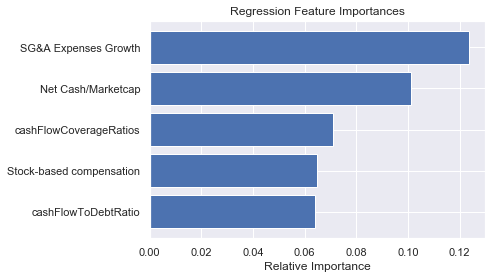

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

# top features for regression model
target_reg = merged_var['PriceVariation_NextYear']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features, target_reg, random_state=1000)

model = RandomForestRegressor(max_depth=10, random_state=1000)
model.fit(X_train_reg,y_train_reg)

reg_columns = features.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-5:]  # top 5 features
plt.title('Regression Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [reg_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From this first visualization, we can see the top 5 most important features as given by the RandomForestRegressor. We've also split our data into testing and training sets using the default 75/25 random split of the dataset. It is important to note that this visualization depicts the top features for the regression variable `PriceVariation_NextYear` and not the classification variable `Class`. From this graph, we see that `SG&A Expenses Growth` is the most important feature in determining `PriceVariation_NextYear`. `Net Cash/Marketcap`, `cashFlowCoverageRatios`, `Stock-based compensation`, and `cashFlowToDebtRatio` round out our 5 most important features for predicting next year's `PriceVariation_NextYear`.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning:

Features [34] are constant.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning:

invalid value encountered in true_divide



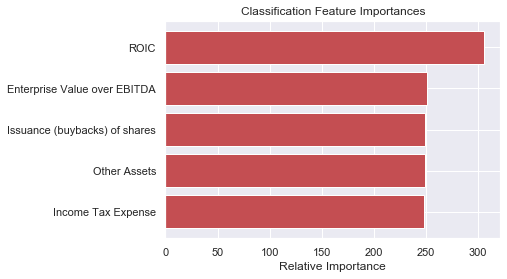

In [110]:
from sklearn.feature_selection import SelectKBest, f_classif

#top features for classification model
target_class = merged_var['Class']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(features, target_class, random_state=1000)
selector = SelectKBest(f_classif, k = 5)
selector.fit(X_train_class, y_train_class)

selected = selector.get_support()

class_columns = []
scores = []
for i in range(len(selected)):
    if selected[i]:
        class_columns.append(features.columns[i])
        scores.append(selector.scores_[i])
scores.sort()
plt.title('Classification Feature Importances')
plt.barh(class_columns, scores, color='r', align='center')
plt.xlabel('Relative Importance')
plt.show()

From this second visualization, we see that 5 completely new features are better predicters of our classification target `Class` compared to those found by the RandomForestRregressor. Instead of using this model, we elected to use the more appropriate SelectKBest from sklearn and to use its default function, f_classif, as we are now dealing with a classification. We also split the data again so that our target is the class variable rather than a continuous one. The visualization shows us that `ROIC`, the return on invested capital (as a percentage), is the most important feature in predicting whether the stock will be a Buy (`1`) or a No Buy (`0`) for the following year. Most financial analysts agree that a firm which has a ROIC exceeding 2% is creating value and vice versa. `Enterprise Value over EBITDA`, `Issuance (buybacks) of shares`, `Other Assets`, and `Income Tax Expense` round out the 5 most important features for predicting `Class`.

In [146]:
from sklearn.decomposition import PCA
import plotly.express as px

#instantiate the PCA object and request two components
pca = PCA(n_components=2, random_state=1000)

#transform the features using the PCA algorithm 
reduced_data = pca.fit_transform(features)
reduced_df = pd.DataFrame(reduced_data, columns = ['Component1', 'Component2'])
target = merged_var['PriceVariation_NextYear']
reduced_df['Sector'] = merged_var.reset_index()['Sector']


g = px.scatter(reduced_df, x='Component1', y='Component2', color = 'Sector')
g.update_layout(title='PCA')
g.show()
print('The PCA 2 components explain', str("%.2f" % sum(pca.explained_variance_ratio_)), 'of the variance in the target')

The PCA 2 components explain 0.22 of the variance in the target


In this third visualization, we see the PCA (Principal Component Analysis) algorithm being used on our data. Both components are only able to explain roughly .22 of the variance in the target variable, in this case `PriceVariation_NextYear`. This begins to explain the weakness of our data in terms of potential regression modeling.

(-100, 150)

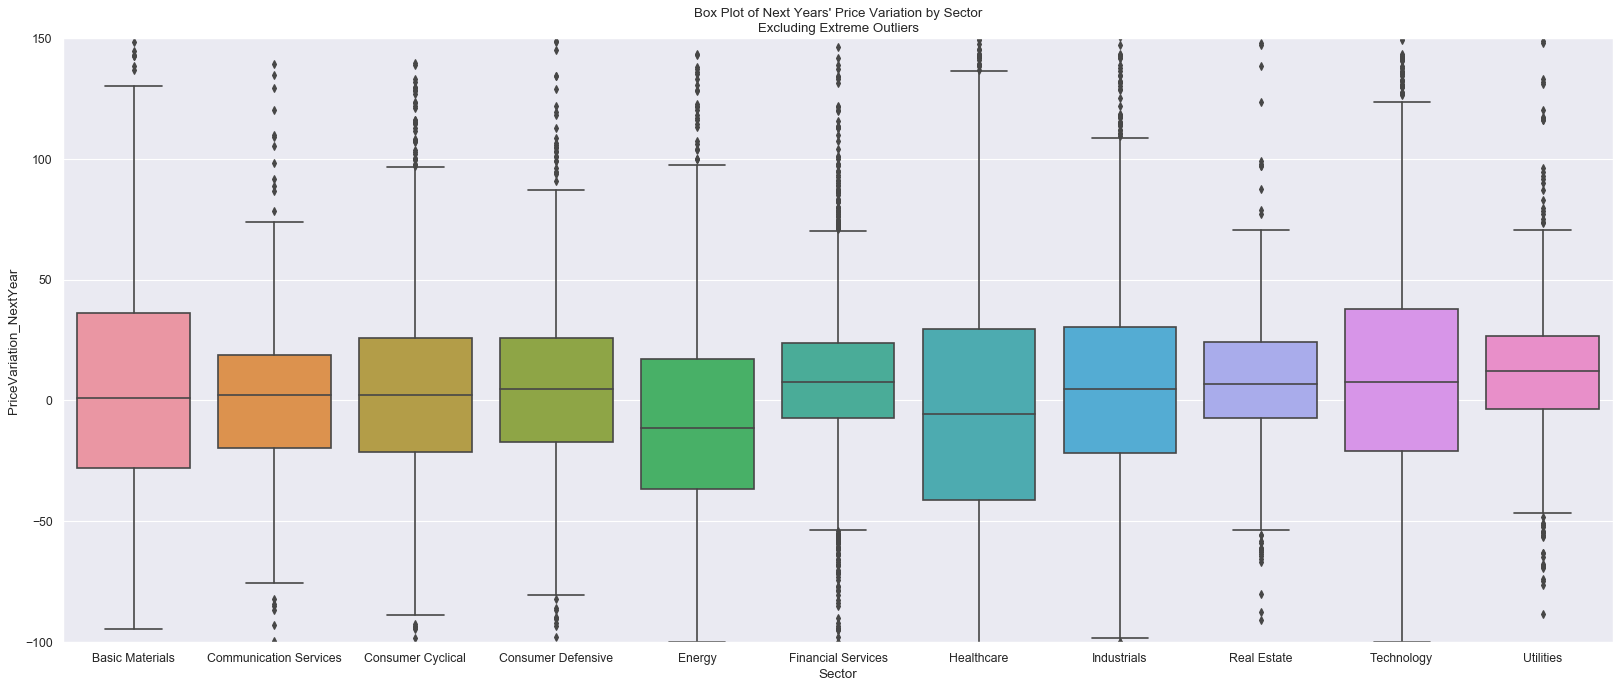

In [147]:
#create box plot to show variances among market sectors
merged_var_indexdrop = merged_var.reset_index()

plt.figure(figsize=(25,10), dpi=80)
sns.boxplot(x='Sector', y='PriceVariation_NextYear', data=merged_var_indexdrop)
plt.title("Box Plot of Next Years' Price Variation by Sector\nExcluding Extreme Outliers")
plt.ylim(-100,150)

For this last visualization, we see that the `PriceVariation_NextYear` factor for each sector is centered around 0, alluding to there not being a stastically significant difference between price variation mean among each sector. This is confirmed in the ANOVA test below, where there are no statistically significant differences calculated among sectors in reference to their next years' price variation.

### 3.3. Model Construction

To test hypothesis 3 in determining whether classification or regression modeling is able to better predict each's respective target variable, we chose to test models in two phases. The first phase uses the following models to predict `Class`; GaussianNB, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier.

In [142]:
#create dataframe to compare classification against regression modeling accuracy
row = []
estimators = {'Naive Bayes': GaussianNB(),
              'Ridge': Ridge(),
              'Gradient Boosting Classifier': GradientBoostingClassifier(),
              'Lasso': Lasso()
             }
for name, model in estimators.items():   
    for i in range(30):
        if name in ['Naive Bayes', 'Gradient Boosting Classifier']:
            top_features = features[class_columns]
            target_class = merged_var['Class']
            X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(top_features, target_class)
            model.fit(X_train_class, y_train_class)
            row.append({'Model': name, 'score': model.score(X_test_class, y_test_class)})
        else:
            top_features = features[reg_columns]
            target_reg = merged_var['PriceVariation_NextYear']
            X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(top_features, target_reg)
            model.fit(X_train_reg, y_train_reg)
            row.append({'Model': name, 'score': model.score(X_test_reg, y_test_reg)})
            
test = pd.DataFrame(row)
test[::10]

,Model,score
0,Naive Bayes,0.583696
10,Naive Bayes,0.580616
20,Naive Bayes,0.595109
30,Ridge,-0.026595
40,Ridge,-0.298975
50,Ridge,-0.009173
60,Gradient Boosting Classifier,0.596377
70,Gradient Boosting Classifier,0.601268
80,Gradient Boosting Classifier,0.599819
90,Lasso,-0.230603


In [143]:
test.groupby(by="Model").agg(["count", "mean", "std", "sem"]).loc[:, "score"]

,count,mean,std,sem
Model,,,,
Gradient Boosting Classifier,30,0.597591,0.005519,0.001008
Lasso,30,-1.421981,5.349560,0.976692
Naive Bayes,30,0.590664,0.005922,0.001081
Ridge,30,-0.221195,0.539383,0.098477


In [144]:
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def oneway_ANOVA(data, IV, DV):
    print(('-'*23), '\n', 'ONE-WAY ANOVA RESULTS', '\n' + ('-'*23), ('\n'*3))
    # Initialize lists of grouped data and their group names
    group_list = []
    cols = []
    # For each group of IV data, append the data to group_list and its group name to cols
    for i in data[IV].unique():
        cols.append(str(i))
        group = data[data[IV]==i][DV]
        group_list.append(group)
    # F test is found through f_oneway and takes any number of groups as inputs (making the function generic)
    results = stats.f_oneway(*group_list)
    fstatistic = format(results[0], '.2f')
    pvalue = format(results[1], '.4f')
    df1 = len(group_list) - 1
    for i in range(len(group_list)):
        df2 = (len(group_list[i]) - 1) * (i + 1)
    
    print('F-test', '\n' + ('-'*6), ('\n'*2) + 'F(' + str(df1) + ',' + str(df2) + ') =', fstatistic + ', p =', 
          str(pvalue), ('\n'*3) + 'Assumption Checks', '\n' + ('-'*17), ('\n'))
    
    # Assumption checks for both Levene and Shapiro are also able to take any number of groups
    levene_results = stats.levene(*group_list)
    shapiros = [stats.shapiro(group_list[i]) for i in range(len(group_list))]
    
    print('Assumption of Equality of Variances:', '\n','\t', levene_results)
    # Assumption Check on Levene
    if levene_results[1] < .05:
        print('\t', 'Assumption is violated. p < .05', '\n')
    else:
        print('\t', 'Assumption is met. p > .05', '\n')
        
    print('Assumption of Normality:')
    # Assumption check on Shapiro
    j = 0
    for i in cols:
        print('\t', i + ':', shapiros[j])
        if shapiros[j][1] < .05:
            print('\t'*2,'Assumption is violated. p < .05', '\n')
        else:
            print('\t'*2,'Assumption is met. p > .05', '\n')
        j += 1
        
    print(('\n'*3), 'Post-hoc Tests', '\n', ('-'*15), '\n')
    # Post-Hoc Test
    mc = MultiComparison(data[DV], data[IV])
    tukey_result = mc.tukeyhsd()
    print(tukey_result)

In [145]:
oneway_ANOVA(test, 'Model', 'score')

----------------------- 
 ONE-WAY ANOVA RESULTS 
----------------------- 



F-test 
------ 

F(3,116) = 3.77, p = 0.0126 


Assumption Checks 
----------------- 

Assumption of Equality of Variances: 
 	 LeveneResult(statistic=1.9086064727099896, pvalue=0.1320399160581583)
	 Assumption is met. p > .05 

Assumption of Normality:
	 Naive Bayes: (0.9478392601013184, 0.14792723953723907)
		 Assumption is met. p > .05 

	 Ridge: (0.44789761304855347, 1.5716301593471371e-09)
		 Assumption is violated. p < .05 

	 Gradient Boosting Classifier: (0.938161313533783, 0.08116358518600464)
		 Assumption is met. p > .05 

	 Lasso: (0.2790066599845886, 4.71549917169245e-11)
		 Assumption is violated. p < .05 




 Post-hoc Tests 
 --------------- 

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
           group1               group2   meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------
Gradient Boosti

**Test & Purpose**

A one-way analysis of variance (ANOVA) was conducted to compare the accuracy scores of regression models Ridge and Lasso to the accuracy scores of classification models Gradient Boosting Classifier and Naive Bayes. All models were trained 30 times each. `Class` was used as the target for the classifiers, and `PriceVariation_NextYear` was used for the regressions. This test's aim was to display the differences of each form of model's accuracy scores and to convey whether or not those differences were statistically significant. 

**Actual Results**

Results revealed a significant difference between Gradient Boosting Classifier and its regression modeling competitors, F(3,116) = 3.77, p = 0.0126 

Post-hoc comparisons using the Tukey test indicated that the average accuracy score of Gradient Boosting Classifier was signficantly larger than Lasso Regression. Naive Bayes was also indicated to have a significantly larger mean accuracy score than Lasso Regression. Neither classifiers had a statistically significant edge over their other regression counterpart, however.

In [170]:
oneway_ANOVA(merged_var.reset_index(), 'Sector', 'PriceVariation_NextYear')

----------------------- 
 ONE-WAY ANOVA RESULTS 
----------------------- 



F-test 
------ 

F(10,5687) = 1.13, p = 0.3312 


Assumption Checks 
----------------- 

Assumption of Equality of Variances: 
 	 LeveneResult(statistic=1.1133005329160917, pvalue=0.34731046813645233)
	 Assumption is met. p > .05 

Assumption of Normality:
	 Basic Materials: (0.03424370288848877, 0.0)
		 Assumption is violated. p < .05 

	 Communication Services: (0.5280581712722778, 8.85732568887495e-33)
		 Assumption is violated. p < .05 

	 Consumer Cyclical: (0.02780890464782715, 0.0)
		 Assumption is violated. p < .05 

	 Consumer Defensive: (0.2993549108505249, 0.0)
		 Assumption is violated. p < .05 

	 Energy: (0.2903202176094055, 0.0)
		 Assumption is violated. p < .05 

	 Financial Services: (0.004206478595733643, 0.0)
		 Assumption is violated. p < .05 

	 Healthcare: (0.015621364116668701, 0.0)
		 Assumption is violated. p < .05 

	 Industrials: (0.8961732983589172, 9.03901969218866e-40)
		 Assumpt

**Test & Purpose**

Another one-way analysis of variance (ANOVA) was conducted to compare the `PriceVariation_NextYear` values of each firm across all sectors in the data. 

**Actual Results**

Results did not reveal a significant difference between each sector's `PriceVariation_NextYear` values, F(10,5687) = 1.13, p = 0.3312 

Post-hoc comparisons using the Tukey test indicated that the `PriceVariation_NextYear` values of every sector, no matter the sectors in comparison, failed to display any statistically significant difference. From this, we can conclude that no sector experiences a statistically above-average or below-average `PriceVariation_NextYear`.

### 3.4. Model Evaluation

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

top_features = features[reg_columns]
target_reg = merged_var['PriceVariation_NextYear']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(top_features, target_reg, random_state=1000)

estimators = {'Random Forest Regressor': RandomForestRegressor(max_depth=10, random_state=1000),
              'Gradient Boosting Regressor': GradientBoostingRegressor(),
              'Decision Tree Regressor': DecisionTreeRegressor(),
              'Linear Regression': LinearRegression(),
              'Lasso': Lasso(),
              'Ridge': Ridge(),
              'MLP Regressor': MLPRegressor()
              }


for name, func in estimators.items():
    print(name+':')
    model = func.fit(X=X_train_reg, y=y_train_reg)
    print('\t', 'R-squared value for training set:', str(r2_score(y_train_reg, model.predict(X_train_reg))))
    print('\t', 'R-squared value for testing set:', str(r2_score(y_test_reg, model.predict(X_test_reg))))


Random Forest Regressor:
	 R-squared value for training set: 0.7801561236940601
	 R-squared value for testing set: -0.031553578386814385
Gradient Boosting Regressor:
	 R-squared value for training set: 0.99743998741871
	 R-squared value for testing set: -0.20589388335916525
Decision Tree Regressor:
	 R-squared value for training set: 0.9999866666053098
	 R-squared value for testing set: -0.2742737790256553
Linear Regression:
	 R-squared value for training set: 0.006663408871469434
	 R-squared value for testing set: -0.007812011377042349
Lasso:
	 R-squared value for training set: 0.006655649234965422
	 R-squared value for testing set: -0.007463859324577271
Ridge:
	 R-squared value for training set: 0.006663360768777271
	 R-squared value for testing set: -0.00778394271646099
MLP Regressor:
	 R-squared value for training set: 0.003482373752080936
	 R-squared value for testing set: -0.0009393087027913527


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



The R^2 values we received from each of the above regressors was extremely unsatisfactory. Every R^2 value on their corresponding testing set revealed a negative R^2 score, meaning the model fit very poorly. Moving forward, we decided the lack of positive modelling available from regressors warranted their dropping, so we will no longer be using these modeling techniques or hypertuning them for better results. 

In [151]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

print('Classifiers using only top 5 features:')

top_features = features[class_columns]
target_class = merged_var['Class']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(top_features, target_class, random_state=1000)

estimators = {'Naive Bayes': GaussianNB(),
              'K Neighbors Classifier': KNeighborsClassifier(), 
              'Decision Tree Classifier': DecisionTreeClassifier(max_depth=5), 
              'Random Forest Classifier': RandomForestClassifier(max_depth=5), 
              'AdaBoost Classifier': AdaBoostClassifier(),
              'Gradient Boosting Classifier': GradientBoostingClassifier()
              }


for name, func in estimators.items():
    print(name+':')
    model = func.fit(X=X_train_class, y=y_train_class)
    print('\t', 'Mean accuracy value for training set:', str(model.score(X_train_class, y_train_class)))
    print('\t', 'Mean accuracy value for testing set:', str(model.score(X_test_class, y_test_class))) 
    
print('Classifiers using all features:')
    
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(features, target_class, random_state=1000)

estimators = {'Naive Bayes': GaussianNB(),
              'K Neighbors Classifier': KNeighborsClassifier(), 
              'Decision Tree Classifier': DecisionTreeClassifier(max_depth=5), 
              'Random Forest Classifier': RandomForestClassifier(max_depth=5), 
              'AdaBoost Classifier': AdaBoostClassifier(),
              'Gradient Boosting Classifier': GradientBoostingClassifier()
              }


for name, func in estimators.items():
    print(name+':')
    model = func.fit(X=X_train_class, y=y_train_class)
    print('\t', 'Mean accuracy value for training set:', str(model.score(X_train_class, y_train_class)))
    print('\t', 'Mean accuracy value for testing set:', str(model.score(X_test_class, y_test_class))) 



Classifiers using only top 5 features:
Naive Bayes:
	 Mean accuracy value for training set: 0.5900223470435465
	 Mean accuracy value for testing set: 0.5896739130434783
K Neighbors Classifier:
	 Mean accuracy value for training set: 0.7025427311711059
	 Mean accuracy value for testing set: 0.5485507246376812
Decision Tree Classifier:
	 Mean accuracy value for training set: 0.6043365343963278
	 Mean accuracy value for testing set: 0.5909420289855073
Random Forest Classifier:
	 Mean accuracy value for training set: 0.6150872742646615
	 Mean accuracy value for testing set: 0.5949275362318841
AdaBoost Classifier:
	 Mean accuracy value for training set: 0.6063900465060096
	 Mean accuracy value for testing set: 0.5871376811594203
Gradient Boosting Classifier:
	 Mean accuracy value for training set: 0.625173642568098
	 Mean accuracy value for testing set: 0.5954710144927536
Classifiers using all features:
Naive Bayes:
	 Mean accuracy value for training set: 0.5833786313945764
	 Mean accuracy 

Our classification models performed very well with some exceptions. The K Neighbors Classifier was overfit with a mean accuracy score on training data of .70 compared to a score of .548 on testing. Besides the K Neighbors Classifier, all other models performed well with minimum overfitting. 

We also examined the differences between classifiers which used only the 5 most important features for their modeling and those which used all features available. Those classifiers which used the entire feature set were much more computationally expensive due to the sheer size of the feature set. Such models did not exhibit exceptionally higher accuracy scores, leading us to believe the extra computational expense was not worth the negligable improvements in model performance. Additionally, the overfitting problems found in the K Neighbors Classifier are still present when using all features rather than the top 5 used previously.

The results indicate that the best performing models were the Random Forest Classifier (.5949 accuracy score), Gradient Boosting Classifier (.5954 accuracy score), and Decision Tree Classifier (.5909 accuracy score). 

### 3.5. Model Optimization

We used GridSearchCV in order to hypertune our classification models. Random Forest Classifier, Gradient Boosting Classifier, Decision Tree Classifier were used as they displayed the best accuracy values on their respective testing sets before tuning. The K Neighbors Classifier showed evidence of overfitting before hypertuning, however we decided not to hypertune this model as the other classifiers showed better results. The reasoning behind our hypertuning is to limit overfitting in all of our models as much as possible, as well as to increase their predictive ability. 

In [163]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'Decision Tree Classifier': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random']
    },
    'Random Forest Classifier': {
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [.75, 2, 3]
    },
    'Gradient Boosting Classifier': {
        'loss': ['deviance', 'exponential'],
        'learning_rate': [.01, .1, .5]
    }
}

### 3.6. Model Testing

In [164]:
target = merged_var['Class']
X_train, X_test, y_train, y_test = train_test_split(top_features, target, random_state=1000)

for name, param_grid in parameters.items():
    model = estimators[name]
    grid_search = GridSearchCV(model, param_grid, cv=10)
    grid_search.fit(X_train, y_train)

    print(name + ':')
    print(f"\tBest Parameters: ", grid_search.best_params_)
    print(f"\tBest Score: ", grid_search.best_score_)

Decision Tree Classifier:
	Best Parameters:  {'criterion': 'gini', 'splitter': 'best'}
	Best Score:  0.5977519812601252
Random Forest Classifier:
	Best Parameters:  {'criterion': 'gini', 'min_samples_split': 3}
	Best Score:  0.6010746967905776
Gradient Boosting Classifier:
	Best Parameters:  {'learning_rate': 0.1, 'loss': 'exponential'}
	Best Score:  0.5978737758512486


After hypertuning, we have found that the Random Forest Classifier would give us the most accurate classification of our data. While the models were unable to accurately predict every stock, we never expected to see such great results out of our classifications. With an accuracy score above .6, we feel as though this hypertuned model is a great first step to begin to understand, and predict, future trends in the stock market. 

<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

In our hunt to further understand the stock market and its trends, we discovered our data on Kaggle. We then took those data files and combined them to better observe data over time, allowing us to see trends in the market from 2014-2018, with predictions from our models being as recent as 2019. 

We quickly realized, however, that with over 200 available features, our models would have a difficult time classifying or predicting continuous target variables. Before we even began to examine the relationships between features and targets in our dataset, we needed to employ feature reduction techniques. Eliminating features with null values over a certain threshold, imputing other NaN values, making sure each feature had enough variance for our models to effectively utilize, and then finally limiting the effects of multicolinearity enabled us to better realize the patterns and relationships we had in at our disposal.

Utilizing powerful visualization techniques was also instrumental in this project. Easily conveying both top feature bar charts, a scatterplot displaying our use of PCA (Principal Component Analysis), and a boxplot which showed the lack of statisticly significant variance between sectors all helped to convey the messages our data analysis provided. 

After determining top features for both our classification models on target `Class` and regressions for target `PriceVariation_NextYear`, we began to use a variety of estimators. After discovering that regressors such as `Random Forest Regressor`, `Gradient Boosting Regressor`, `Decision Tree Regressor` and others would not yield satisfactory results when used with this dataset, we focused on hypertuning our classification models. Specifically, we employed `Decision Tree Classifier`, `Random Forest Classifier`, and `Gradient Boosting Classifier`. Using sklearn's `train_test_split` functionality in conjuction with `GridSearchCV`, we were able to hypertune these models for best accuracy results. 

We rejected our null hypothesis for both Hypothesis 1 and 2 on the basis that a moderate amount of the correlation could be explained by the respective regression formula. Hypothesis 3 was rejected as shown by the boxplot. Hypothesis 4 was mildly supported by our ANOVA tests.

In terms of further work on this project, the natural continuation of this research is to continually add new years' worth of data as they become available. The most recent year available to analyze is 2018; naturally, the model would become even more accurate with more recent data. Data older than 2014 may also be helpful, if at the minimum to create a larger data sample to analyze.  Furthermore, with additional research on different types of machine learning algorithms, it may be possible to get a higher accuracy rating for the data than that which has already been achieved.

Finally, an interactive interface would help ensure that this study would be useful to investors; ultimately, we envision this research forming the basis of a database where a user could search for a company and receive information about that company as well as projected investment information.

<hr style="height:2px; border:none; color:black; background-color:black;">

## Contributions

Jake Janowski designed the project topic and the method in which it would be carried out. He was also largely responsible for the analysis portion of the project.

Eric Weiss focused on the coding portion of the project, continuing to fine tune the machine learning algorithms so that the data could help reach a logical conclusion.